In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df=pd.read_csv("Admission_Prediction.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [5]:
df.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [6]:
df.drop(columns="Serial No.",inplace=True)

In [7]:
for i in df.columns:
    if df[i].isna().sum()>0:
        df[i].fillna(df[i].median(),inplace=True)

In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.572000,107.184000,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.104207,6.051395,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.819885,0.623467,0.608349,0.528105,0.818344,0.544756,0.802321
TOEFL Score,0.819885,1.000000,0.644189,0.642976,0.535500,0.805547,0.464858,0.786543
University Rating,0.623467,0.644189,1.000000,0.713657,0.606949,0.697704,0.424966,0.681482
SOP,0.608349,0.642976,0.713657,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.528105,0.535500,0.606949,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.818344,0.805547,0.697704,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.544756,0.464858,0.424966,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.802321,0.786543,0.681482,0.684137,0.645365,0.882413,0.545871,1.000000


In [10]:
df.corr()["Chance of Admit"].sort_values()

Research             0.545871
LOR                  0.645365
University Rating    0.681482
SOP                  0.684137
TOEFL Score          0.786543
GRE Score            0.802321
CGPA                 0.882413
Chance of Admit      1.000000
Name: Chance of Admit, dtype: float64

## Normal distribution of columns

In [11]:
import scipy.stats as st

In [12]:
import pylab

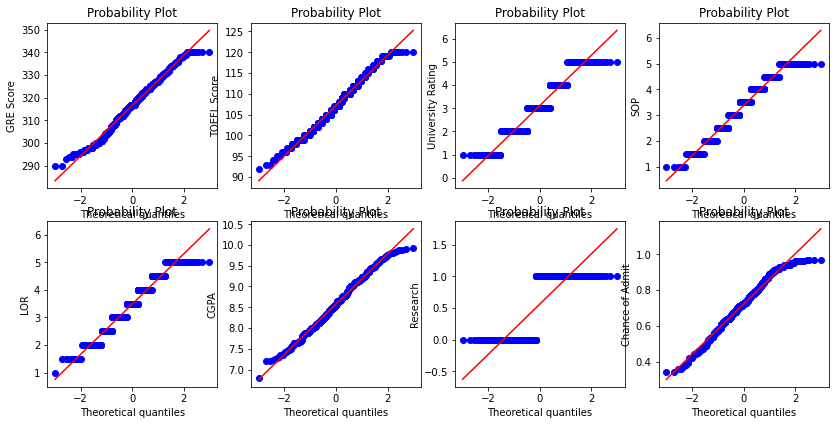

In [13]:
plt.figure(figsize=(14,14))
plot_num=1
for i in df.columns:
    if plot_num<9:
        plt.subplot(4,4,plot_num)
        st.probplot(df[i],dist="norm",plot=pylab);
        plt.ylabel(i)
        plot_num+=1

In [14]:
df.skew()

GRE Score           -0.056060
TOEFL Score          0.104963
University Rating    0.102097
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

In [15]:
df.kurt()

GRE Score           -0.612418
TOEFL Score         -0.616477
University Rating   -0.766867
SOP                 -0.705717
LOR                 -0.745749
CGPA                -0.561278
Research            -1.949018
Chance of Admit     -0.454682
dtype: float64

In [16]:
x=st.yeojohnson(df["Research"])

In [17]:
pd.Series(x[0]).kurt()

-1.9490180796876393

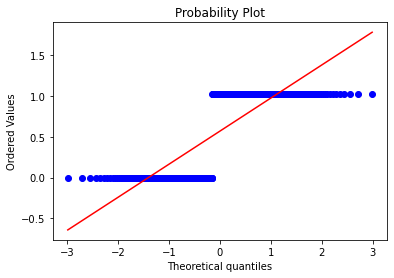

In [18]:
st.probplot(x[0],dist="norm",plot=pylab);

In [19]:
a=df["Research"].apply(lambda x:np.exp(x))

In [20]:
a.skew()

-0.24247492100796814

In [21]:
a.kurt()

-1.9490180796876397

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
x=df.drop(columns=["Chance of Admit"])
y=df[["Chance of Admit"]]

In [24]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.10,random_state=123)

In [27]:
x_train.shape

(450, 7)

In [28]:
x_test.shape

(50, 7)

In [29]:
y_train.shape

(450, 1)

In [30]:
y_test.shape

(50, 1)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr=LinearRegression()

In [33]:
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred=lr.predict(x_test)

In [35]:
y_pred[0:5]

array([[0.80458018],
       [0.93568835],
       [0.53058508],
       [0.62450253],
       [0.81775499]])

In [36]:
y_test.head()

,Chance of Admit
229,0.82
337,0.94
327,0.69
416,0.65
306,0.79


In [37]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [38]:
r2_score(y_test,y_pred)

0.7731323352280923

In [39]:
mse=mean_squared_error(y_test,y_pred)

In [40]:
mse

0.00517139397023609

In [41]:
rmse=np.sqrt(mse)
rmse

0.0719124048425311

In [42]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.04776271248318863

In [43]:
mape = mean_absolute_percentage_error(y_test,y_pred)
mape

0.08132269226042838

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


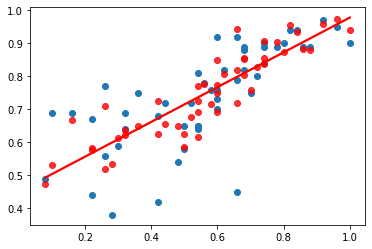

In [44]:
plt.scatter(x_test[:,0],y_test)
sns.regplot(x_test[:,0],y_pred,color="red",ci = False)
plt.show();

In [45]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet,LassoCV,RidgeCV,ElasticNetCV

In [46]:
lasso=Lasso()

In [47]:
lasso.fit(x_train,y_train)

Lasso()

In [48]:
y_pred_lasso=lasso.predict(x_test)

In [49]:
r2_score(y_test,y_pred_lasso)

-0.021794244286899245

In [50]:
ridge=Ridge()

In [51]:
ridge.fit(x_train,y_train)

Ridge()

In [52]:
y_pred_ridge=ridge.predict(x_test)

In [53]:
r2_score(y_test,y_pred_ridge)

0.7732667321465809

In [54]:
eln=ElasticNet()

In [55]:
eln.fit(x_train,y_train)

ElasticNet()

In [56]:
y_pred_eln=eln.predict(x_test)

In [57]:
r2_score(y_test,y_pred_eln)

-0.021794244286899245

In [58]:
l1=LassoCV(cv=3)

In [59]:
l1.fit(x_train,y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(cv=3)

In [60]:
y_pred_l1=l1.predict(x_test)

In [64]:
r2_score(y_test,y_pred_l1)

0.7731702970563441

In [61]:
lr.score(x_test,y_test))

0.7731323352280923

In [62]:
lr.score(x_train,y_train)

0.8259686170451069